# Dataset Acquisition

This is a simple utility to help download and pare down the original dataset

In [1]:
import pandas as pd
import re
import os
import zipfile
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf

pd.options.display.max_rows = 999
sns.set()
%matplotlib inline

## Look at the dataset description

In [2]:
# Load the Dataset description
df = pd.read_csv('all_data_info.csv')
print(f'Length: {len(df)}')
print(f'{round(df.size_bytes.sum()/1000000000,1)} GB')

# Check for missing values
df.isna().sum()

Length: 103250
40.1 GB


artist              0
date            26363
genre            1254
pixelsx             0
pixelsy             0
size_bytes          0
source            167
style             986
title             122
artist_group        0
in_train            0
new_filename        0
dtype: int64

In [3]:
# Clean the Date Field
def clean_date(date_str):
    if pd.isnull(date_str):
        return None
    
    re_ = re.search('(\d\d\d\d?)', date_str)
    if not re_:
        print(f'No match on {date_str}')
        return None
    
    return re_.group(1)

df['date'] = df.date.map(clean_date).astype(float)

No match on ific
No match on rain
No match on rver


In [4]:
# Look at the breakdowns by style

style_df = df.groupby('style').agg(
    {'size_bytes' : 'sum', 'artist' : 'count', 'date' : 'mean'}).rename(
    {'artist' : 'count'}, axis = 'columns').sort_values('count', ascending = False)

def display_size(bytes_):
    return str(round(bytes_/1000000000,1)) + ' GB'

style_df['size_bytes'] = style_df.size_bytes.map(display_size)
style_df.to_csv('style-breakdown.csv')
print(f'{len(style_df)} styles')
style_df

136 styles


,size_bytes,count,date
style,,,
Impressionism,4.6 GB,10643,1895.697380
Realism,3.6 GB,10523,1885.592199
Romanticism,3.6 GB,9285,1848.410370
Expressionism,1.9 GB,7013,1934.248116
Post-Impressionism,2.4 GB,5778,1911.790857
Art Nouveau (Modern),3.9 GB,4899,1908.569947
Baroque,1.8 GB,4400,1651.675612
Surrealism,1.3 GB,4167,1948.615335
Symbolism,1.9 GB,3476,1903.205618


In [5]:
# Look at the breakdowns by artist

artist_df = df.groupby('artist').agg(
    {'size_bytes' : 'sum', 'new_filename' : 'count'}).rename(
    {'new_filename' : 'count'}, axis = 'columns').sort_values('count', ascending = False)

def display_size(bytes_):
    return str(round(bytes_/1000000,1)) + ' MB'

artist_df['size_bytes'] = artist_df.size_bytes.map(display_size)
artist_df = artist_df[artist_df['count'] >= 100]

artist_df.to_csv('artist-breakdown.csv')
print(f'{len(artist_df)} artists with at least 100 paintings')
artist_df

257 artists with at least 100 paintings


,size_bytes,count
artist,,
John Singer Sargent,154.0 MB,500
Rembrandt,274.1 MB,500
Pablo Picasso,232.4 MB,500
Ivan Shishkin,123.3 MB,500
Ivan Aivazovsky,110.8 MB,500
Giovanni Battista Piranesi,618.3 MB,500
Gustave Dore,352.7 MB,500
Pierre-Auguste Renoir,198.1 MB,500
Ilya Repin,86.0 MB,500


## Process the Files

In [6]:
def get_lookup_dict(col):
    return dict(df.set_index('new_filename')[[col]].to_records())

In [7]:
artist_lookup = get_lookup_dict('artist')
style_lookup  = get_lookup_dict('style')

In [8]:
# Hand annotated to select a handful (about 50) of artists whos work should be retained
good_artists = pd.read_excel('artist-breakdown-annotated.xlsx')
good_artists = good_artists[good_artists.fillna(0).keep.astype(bool)].artist.tolist()

In [9]:
# Downloading. Comment line 6 to actually do the download
#  Requires kaggle API installation (conda install kaggle)

to_download = [f'train_{i}' for i in range(0,10)]
to_download.append('test')
to_download.append('replacements_for_corrupted_files')
to_download = [] # Comment this out if you want to do the download
print(f'Downloading: {to_download}')


for download_file in to_download:
    if not os.path.exists('./' + download_file + '.zip'):
        print(f'Downloading {download_file}\n'
               'View progress in notebook terminal')
        os.system(f'kaggle competitions download -f {download_file}.zip painter-by-numbers')

    print(f'Extracting {download_file}')
    with zipfile.ZipFile('./' + download_file + '.zip', 'r') as zip_ref:
        zip_ref.extractall('./')

    dir_name = f'./{download_file}/'
    print(f'Processing {download_file}')
    image_names = os.listdir(dir_name)

    for file in image_names:
        artist = artist_lookup[file]
        if artist in good_artists:
            os.rename(dir_name + file, './images/' + file)
        else:
            os.remove(dir_name + file)

    os.remove(download_file + '.zip')
    os.removedirs(dir_name)
    print(f'Done with {download_file}\n----------------------------\n')
    

Downloading: []


## Look at statistics for the resulting images

In [10]:
df_trimmed = df[df.artist.isin(good_artists)]

print(f'{len(df_trimmed.artist.unique())} artists included')

# Artists mostly are in one style with a few miscellany
artist_style_df = df_trimmed.groupby(['artist', 'style']).apply(len).reset_index()

artist_style_df.rename({0 : 'count'}, axis = 'columns', inplace = True)

def get_top_style_pct(style_counts_series):
    return style_counts_series.max() / style_counts_series.sum()

artist_style_pct = artist_style_df.groupby('artist')['count'].agg(get_top_style_pct)

53 artists included


In [60]:
def get_top_style(style_counts_df):
    row_index = style_counts_df['count'].idxmax()
    return style_counts_df.loc[row_index, 'style']

In [62]:
artist_top_style_df = df_trimmed.groupby(['artist', 'style']).apply(len).reset_index()
artist_top_style_df.rename({0 : 'count'}, axis = 'columns', inplace = True)
artist_top_style_df = artist_top_style_df.groupby('artist').apply(get_top_style)

In [65]:
artist_top_style_df.sort_values().reset_index().to_csv('artist_top_style.csv')

In [ ]:
artist_style_pct.sort_values()

In [13]:
artist_style_pct.describe()

count    53.000000
mean      0.764880
std       0.235302
min       0.280000
25%       0.531746
50%       0.870861
75%       1.000000
max       1.000000
Name: count, dtype: float64

Look at the aspect ratios
count    14703.000000
mean         1.119409
std          0.369298
min          0.055972
25%          0.785904
50%          1.200000
75%          1.352044
max          4.322884
dtype: float64


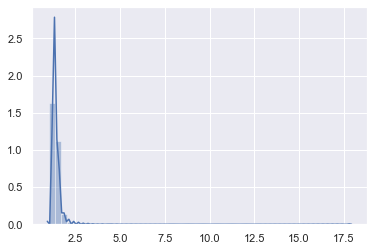

In [14]:
# Aspect Ratio
print('Look at the aspect ratios')
aspect = df_trimmed.pixelsy/df_trimmed.pixelsx
print(aspect.describe())
max_aspect = aspect.apply(lambda x : 1/x if x < 1 else x)
sns.distplot(max_aspect)
plt.show()

Look at the width
count    14703.000000
mean      1127.803373
std        594.479816
min        300.000000
25%        722.000000
50%        983.000000
75%       1354.000000
max       8533.000000
Name: pixelsx, dtype: float64


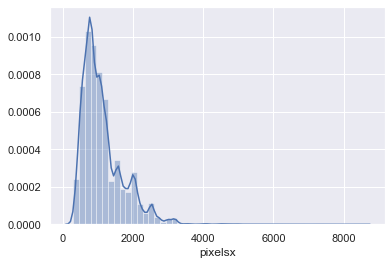

In [15]:
# Sizing
print('Look at the width')

print(df_trimmed.pixelsx.describe())

sns.distplot(df_trimmed.pixelsx)
plt.show()

Look at the size
count    1.470300e+04
mean     1.630612e+06
std      1.843215e+06
min      1.500800e+05
25%      5.755885e+05
50%      9.287950e+05
75%      2.038482e+06
max      3.690522e+07
dtype: float64


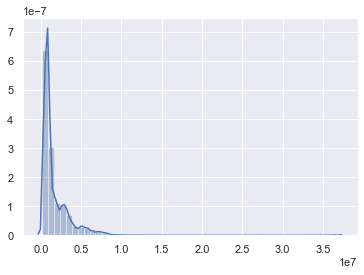

In [16]:
# Look at the total size
print('Look at the size')
size = df_trimmed.pixelsx * df_trimmed.pixelsy

print(size.describe())

sns.distplot(size)
plt.show()

## Dataset Summary for Presentation

In [17]:
df_trimmed

,artist,date,genre,pixelsx,pixelsy,size_bytes,source,style,title,artist_group,in_train,new_filename
18,Hieronymus Bosch,1515.0,religious painting,8533.0,4325.0,6675952.0,wikiart,Northern Renaissance,The Garden of Earthly Delights,train_and_test,True,82352.jpg
20,Mark Rothko,1968.0,abstract,4912.0,7360.0,4666915.0,wikiart,Abstract Art,Untitled,train_and_test,False,85864.jpg
32,Diego Velazquez,1645.0,self-portrait,4841.0,5947.0,8157404.0,wikiart,Baroque,Self-portrait,train_and_test,True,70728.jpg
37,Titian,1562.0,self-portrait,4524.0,6018.0,8847626.0,wikiart,Mannerism (Late Renaissance),Self-portrait,train_and_test,False,15715.jpg
41,Georges Seurat,1884.0,NaN,6367.0,4226.0,11579390.0,wikipedia,Pointillism,Bathers at Asnières,train_and_test,True,39751.jpg
...,...,...,...,...,...,...,...,...,...,...,...,...
103090,Andy Warhol,1962.0,advertisement,337.0,450.0,20328.0,wikiart,Pop Art,3 Coke Bottles,train_and_test,True,50089.jpg
103125,M.C. Escher,1946.0,cityscape,356.0,425.0,79585.0,wikiart,Surrealism,"Street in Scanno, Abruzzi",train_and_test,True,73267.jpg
103155,Mark Rothko,1961.0,abstract,500.0,302.0,24397.0,wikiart,Color Field Painting,"No. 14 (Horizontals, White over Darks)",train_and_test,True,8717.jpg
103242,Michelangelo,1509.0,nude painting (nu),314.0,478.0,32773.0,wikiart,High Renaissance,Ignudo,train_and_test,False,12758.jpg


In [ ]:
# Look at the breakdowns by style

style_df = df_trimmed.groupby('style').agg(
    {'artist' : 'count'}).rename(
    {'artist' : 'count'}, axis = 'columns').sort_values('count', ascending = False)

style_df.to_csv('trimmed-style-breakdown.csv')
print(f'{len(style_df)} styles')

In [52]:
# Look at the breakdowns by artist

artist_df = df_trimmed.groupby('artist').agg(
    {'style' : 'count'}).rename(
    {'style' : 'count'}, axis = 'columns').sort_values('count', ascending = False)

print(f'{len(artist_df)} artists')

53 artists


In [ ]:
from math import floor

df_trimmed = df_trimmed.assign(century = (df_trimmed['date']/100).map(floor, na_action = 'ignore'))
df_trimmed['century'] = (df_trimmed['century'] * 100)
centuries = df_trimmed.century.value_counts(dropna = False)
centuries.reset_index().to_csv('centuries.csv')

centuries = centuries.reset_index().fillna(2100)

centuries['index'] = centuries['index'].astype(int)
centuries = centuries.sort_values('index')
centuries['index'] = centuries['index'].astype(str)
centuries['index'].iloc[-1] = 'N/A'

In [66]:
sns.set_context('talk')
sns.set_style('darkgrid', {'patch.edgecolor' : 'none', 'patch.force_edgecolor' : False})

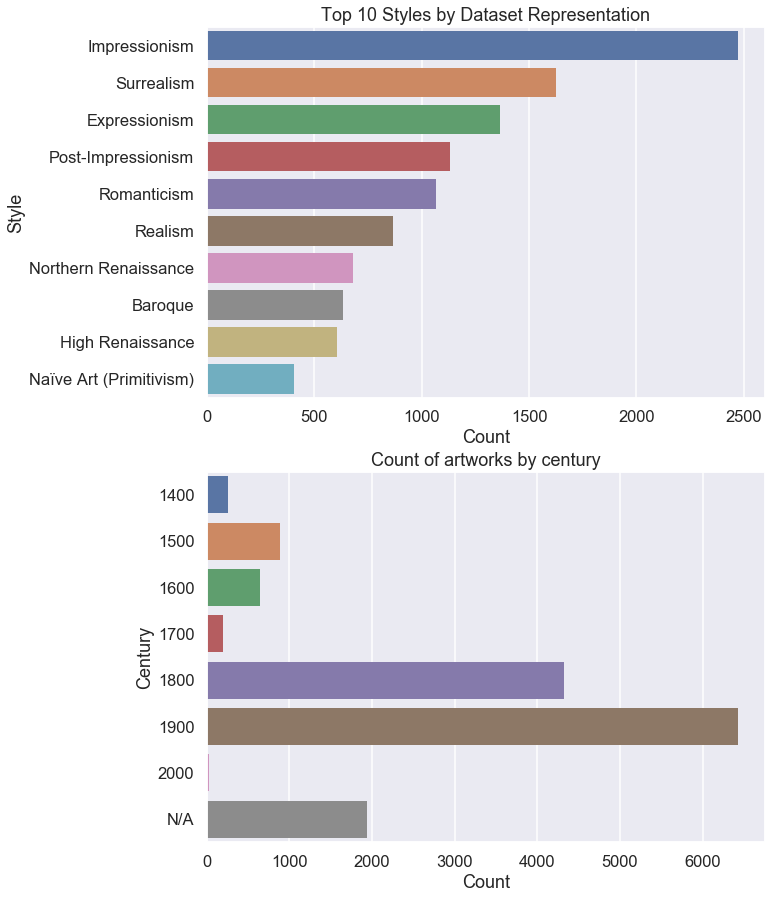

In [69]:
fig, (ax1, ax3) = plt.subplots(2, figsize = (10,15), sharex = False)

# Styles
sns.barplot(x = 'count', y = 'style', data = style_df.iloc[:10].reset_index(), ax = ax1)
ax1.set_xlabel('Count')
ax1.set_ylabel('Style')
ax1.set_title('Top 10 Styles by Dataset Representation')

# # Artists
# sns.barplot(x = 'count', y = 'artist', data = artist_df.iloc[:10].reset_index(), ax = ax2)
# ax2.set_xlabel('Count')
# ax2.set_ylabel('Artist')
# ax2.set_title('Top 10 Artists by Dataset Representation')

# Timeline
sns.barplot(y = 'index', x = 'century', data = centuries, ax = ax3);
ax3.set_ylabel('Century')
ax3.set_xlabel('Count')
ax3.set_title('Count of artworks by century')

fig.savefig('eda.png', bbox_inches = 'tight', bbox_extra_artists = ax.get_ymajorticklabels(), transparent = True)
plt.show()

In [ ]:
# Look at the breakdowns by artist

artist_df = df.groupby('artist').agg(
    {'size_bytes' : 'sum', 'new_filename' : 'count'}).rename(
    {'new_filename' : 'count'}, axis = 'columns').sort_values('count', ascending = False)

def display_size(bytes_):
    return str(round(bytes_/1000000,1)) + ' MB'

artist_df['size_bytes'] = artist_df.size_bytes.map(display_size)
artist_df = artist_df[artist_df['count'] >= 100]

artist_df.to_csv('artist-breakdown.csv')
print(f'{len(artist_df)} artists with at least 100 paintings')
artist_df

In [ ]:
impressionism = df_trimmed[df_trimmed['style'] == 'Impressionism']
print(impressionism['artist'].unique())
impressionism[impressionism['artist'] == 'Mary Cassatt']

In [ ]:
surrealism = df_trimmed[df_trimmed['style'] == 'Surrealism']
print(surrealism['artist'].unique())
surrealism[surrealism['artist'] == 'Salvador Dali']

In [ ]:
df_trimmed[df_trimmed.new_filename == '1259.jpg']

In [136]:
surrealism = df_trimmed[df_trimmed['style'] == 'Surrealism']
print(surrealism['artist'].unique())
# impressionism[impressionism['artist'] == 'Mary Cassatt']

['Joan Miro' 'Paul Klee' 'Salvador Dali' 'Rene Magritte' 'M.C. Escher'
 'Max Ernst' 'Marc Chagall' 'Fernand Leger' 'Diego Rivera' 'Pablo Picasso'
 'Mark Rothko']


In [132]:
megapixels = (df_trimmed.pixelsx * df_trimmed.pixelsy) / 1000000
megapixels.describe()

count    14703.000000
mean         1.630612
std          1.843215
min          0.150080
25%          0.575589
50%          0.928795
75%          2.038482
max         36.905225
dtype: float64

In [ ]:
df_trimmed[df_trimmed.date > 1980]

In [127]:
expressionism = df_trimmed[df_trimmed['style'] == 'Expressionism']
print(expressionism['artist'].unique())
expressionism[expressionism['artist'] == 'Edvard Munch']

['Amedeo Modigliani' 'Egon Schiele' 'Paul Klee' 'Henri Matisse'
 'Pablo Picasso' 'Otto Dix' ' Wassily Kandinsky' 'Salvador Dali'
 'Max Ernst' 'Edvard Munch' 'Marc Chagall' 'M.C. Escher' 'Mark Rothko']


,artist,date,genre,pixelsx,pixelsy,size_bytes,source,style,title,artist_group,in_train,new_filename
8334,Edvard Munch,1901.0,genre painting,1717.0,1908.0,416933.0,wikiart,Expressionism,The Girls on the Bridge,train_and_test,True,40098.jpg
8542,Edvard Munch,1893.0,genre painting,1611.0,2000.0,650104.0,wikiart,Expressionism,The Scream,train_and_test,True,4864.jpg
8680,Edvard Munch,1894.0,nude painting (nu),1512.0,2111.0,410611.0,wikipedia,Expressionism,Puberty,train_and_test,True,33187.jpg
9643,Edvard Munch,1894.0,genre painting,1549.0,1932.0,414807.0,wikiart,Expressionism,Eye in Eye,train_and_test,True,85680.jpg
10091,Edvard Munch,1904.0,self-portrait,1155.0,2516.0,336972.0,wikipedia,Expressionism,Self-Portrait with Brushes,train_and_test,False,31290.jpg
10180,Edvard Munch,1918.0,religious painting,1515.0,1905.0,463806.0,wikiart,Expressionism,Adam and Eve,train_and_test,True,35889.jpg
10284,Edvard Munch,1900.0,genre painting,1724.0,1661.0,429800.0,wikiart,Expressionism,Red Virginia Creeper,train_and_test,True,23210.jpg
10552,Edvard Munch,1915.0,genre painting,1885.0,1489.0,469169.0,wikiart,Expressionism,By the Deathbed (Fever) I,train_and_test,True,76043.jpg
11060,Edvard Munch,1902.0,genre painting,1734.0,1548.0,406994.0,wikiart,Expressionism,Women on the Bridge,train_and_test,False,37307.jpg
11083,Edvard Munch,1893.0,genre painting,1717.0,1561.0,537071.0,wikiart,Expressionism,Death in the sickroom,train_and_test,True,45339.jpg


In [120]:
df_trimmed['style'].unique()

array(['Northern Renaissance', 'Abstract Art', 'Baroque',
       'Mannerism (Late Renaissance)', 'Pointillism', 'High Renaissance',
       'Early Renaissance', 'Romanticism', 'Impressionism', 'Surrealism',
       'Realism', 'Neo-Expressionism', 'Symbolism', 'Post-Impressionism',
       'Art Nouveau (Modern)', 'Cubism', 'Cloisonnism', 'Japonism',
       'Expressionism', 'Color Field Painting', 'Orientalism',
       'Social Realism', 'Tubism', 'Verism', 'Tonalism', 'Purism',
       'Naïve Art (Primitivism)', 'Abstract Expressionism',
       'Neoclassicism', 'Constructivism', nan, 'New Realism',
       'Regionalism', 'Fauvism', 'Automatic Painting', 'Precisionism',
       'Metaphysical art', 'Op Art', 'Dada', 'Muralism', 'Divisionism',
       'Orphism', 'Art Deco', 'Pop Art', 'Lyrical Abstraction',
       'Synthetic Cubism', 'Analytical Cubism', 'Synthetism',
       'Suprematism', 'Minimalism', 'Renaissance',
       'Post-Painterly Abstraction'], dtype=object)

## Organize the Images into subfolders

In [14]:
dir_name = './images/'
image_names = os.listdir(dir_name)

for image in image_names:
    # See if the file is still here and check it is a file
    if not os.path.exists(dir_name + image) or os.path.isdir(dir_name + image):
        continue
    
    if image not in artist_lookup:
        continue
        
    subdir = dir_name + artist_lookup[image] + '/'
    if not os.path.exists(subdir):
        os.mkdir(subdir)
    os.rename(dir_name + image, subdir + image)

## Train Test Split

In [24]:
train_all, test = train_test_split(df_trimmed, test_size = 0.2, random_state = 42, stratify = df_trimmed.artist)
train, validate = train_test_split(train_all, test_size = 0.2, random_state = 42, stratify = train_all.artist)
print(f'Sizes:\n'
      f' Train    : {len(train)}\n'
      f' Test     : {len(test)}\n'
      f' Validate : {len(validate)}'
     )

Sizes:
 Train    : 9409
 Test     : 2941
 Validate : 2353


In [ ]:
# Make the directory structure
for dir_ in ['./train/', './test/', './validate/']:
    if not os.path.exists(dir_):
        os.mkdir(dir_)
    for artist in good_artists:
        if not os.path.exists(dir_ + artist):
            os.mkdir(dir_ + artist)

In [ ]:
for dir_, set_ in [
    ('./train/'   , train),
    ('./test/'    , test ),
    ('./validate/', validate)
]:
    for i in range(len(set_)):
        artist   = set_.artist.iloc[i]
        filename = set_.new_filename.iloc[i]
        src      = f'./images/{artist}/{filename}'
        dest     = dir_ + f'{artist}/{filename}'
        if os.path.exists(src):
            os.rename(src, dest)

In [ ]:
for artist in good_artists:
    if os.path.exists(f'./images/{artist}'):
        os.removedirs(f'./images/{artist}')

In [ ]:
for dir_ in ['train', 'test', 'validate']:
    if os.path.exists(dir_):
        os.rename(f'./{dir_}', f'./images/{dir_}')

## Delete Corrupted Files

In [ ]:
for root, subdirs, files in os.walk('../dataset/images'):
    for file in files:
        try:
            file_path = root + '/' + file
            img = tf.io.read_file(file_path)
            img = tf.image.decode_jpeg(img, channels=3)
        except tf.errors.InvalidArgumentError:
            if file_path.endswith('.jpg'):
                os.remove(file_path)
                print(f'Deleting image {file_path}')